In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [5]:
df = pd.read_csv('breast-cancer.csv')

In [6]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9736842105263158


In [12]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_scaled, y_train)
ada_pred = ada_clf.predict(X_test_scaled)
ada_acc = accuracy_score(y_test, ada_pred)
print("AdaBoost Accuracy:", ada_acc)

AdaBoost Accuracy: 0.9736842105263158


In [14]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_scaled, y_train)
xgb_pred = xgb_clf.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_acc)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:04:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9736842105263158


In [15]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy': [rf_acc, ada_acc, xgb_acc]
})
print(results)

           Model  Accuracy
0  Random Forest  0.973684
1       AdaBoost  0.973684
2        XGBoost  0.973684


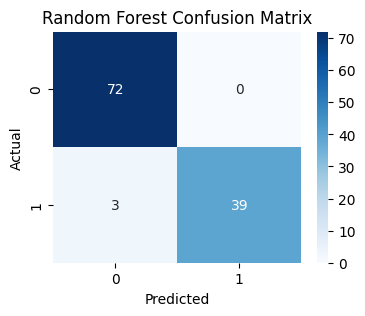

Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



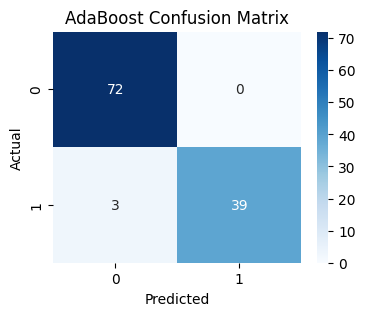

AdaBoost Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



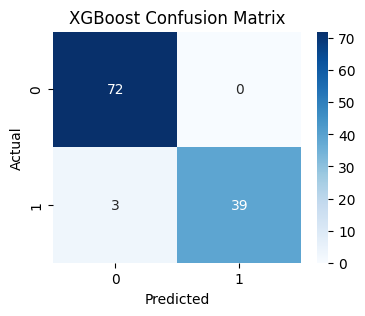

XGBoost Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
models = {'Random Forest': rf_pred, 'AdaBoost': ada_pred, 'XGBoost': xgb_pred}
for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(f"{name} Classification Report:")
    print(classification_report(y_test, preds, target_names=['Benign', 'Malignant']))